In this post, I'm going to write about how the ever versitile normal distribution can be used to approximate a Bayesian posterior distribution, which is not a direct result of the central limit theorem.  The result has a straight forward proof (given some assumptions) which I will attempt to sketch, and I'll also simulate a few different scenarios to see how it works in practice.

<!-- TEASER_END -->

# Background

We're going to first start by reviewing some simple terminology and definitions regarding Bayesian methods to make the discussion later a bit easier to follow.  The main problem we're trying to solve: given probability model \\(\mathcal{M}\\) (e.g. normal distribution) and some data denoted by \\(y\\) (e.g. observations of customer purchases or readings from a machine), we wish to find a probability distribution of the parameters \\(\theta\\) (e.g. \\(\mu\\) and \\(\sigma\\) in the case of a normal distribution).  The basic idea is given by Bayes theorem:

$$
P(\theta | y) = \frac{P(y | \theta) P(\theta)}{P(y)} = C \cdot P(y | \theta) P(\theta) \tag{1}
$$

Some definitions:

\\( P(\theta | y) \\) is called the **posterior** distribution.
 * a \\(P(y | \theta)\\) is called the **likelihood function**.
 * a \\(P(\theta)\\) is called the **prior** distribution.
 * a \\(P(y)\\) is called the marginal likelihood.

Notice the second form in Equation 1 where \\(\frac{1}{P(y)}\\) term is replaced by a constant \\(C\\).  This is usually written out like this because once you've collected all your data, it's fixed.  Thus, the probability of it occuring does not change with respect to the parameters of your model \\(\theta\\).  Think of it as a normalizing constant to make the posterior have a proper probability distribution (i.e. sum to \\(1\\)). 

[Bayesian inference](https://en.wikipedia.org/wiki/Bayesian_inference) usually follows these high level steps:

1. Decide on a probability model \\(\mathcal{M}\\).
2. Decide on a prior distribution that encodes your previous knowledge about the problem.  For example, if we're modeling the average conversion rate of an email campaign, we might look at previous campaigns and find a number around (or a distribution centred at) 1%.
3. Given samples \\(y\\), find the posterior distribution of your model parameters \\(\theta\\) according to Equation 1.  This is usually done via simulation except for the most basic cases where the posterior has a closed form expression.

Of course, there is a lot of nuance to each of these steps but by and large this is what usually happens.  

The big contrast between this method and more traditional statistics methods (frequentist methods) is that the latter focuses more on the likelihood function.  A popular estimate for \\(\theta\\) is usually given by the [maximum likelihood estimate](https://en.wikipedia.org/wiki/Maximum_likelihood) (MLE), where it tries to find \\(\theta\\) that maximizes the likelihood function.  There's a huge amount of literature written on the differences between the two but here are some of the bigger points:

* The MLE estimate provides a point estimate (a single value) of the parameter (or sometimes a confidence interval).  The Bayesian method provides a proper probability distribution for the parameter.
* The Bayesian method is "more" subjective because of the use of the prior.  The reasoning is that you *should* use everything you know about the problem when conducting inference.  However, finding a prior that accurately represents your state of knowledge is definitely a challenge.
* The MLE is in a way still "subjective" because the choice of model \\(\mathcal{M}\\) is an implicit "prior".
* Bayesian methods treat the model parameters as random variables (i.e. the posterior) while frequentist methods usually treat the parameters as [fixed](link://slug/hypothesis-testing) (with the assumption that there is some theoretical "true" value) and what you're trying to find is a confidence interval that "traps" the fixed value a certain percentage of the time.

With that incredibly brief introduction to Bayesian methods, let's see how we can approximate the posterior with a normal distribution.


# Normal Approximation to the Posterior Distribution [<sup>[1]</sup>](#fn-1)

The normal approximation for the posterior distribution can be used in several ways.  The first is directly as an approximation of the posterior.  This usually works well in low dimensional \\(\theta\\) parameter spaces.  Even for high dimensional parameter spaces, it may also work well when computing the marginal distribution across one of the components of \\(\theta\\).  The reason you might want an approximation at all is that for more complex models, a closed form analytical solution may not be possible.  This is usually solved by some kind of [MCMC](link://slug/markov-chain-monte-carlo-mcmc-and-the-metropolis-hastings-algorithm) simulation that allows you to draw an arbitrary number of samples that will allow you to empirically build the posterior distribution.  Having an approximate analytical normal distribution does have advantages over just a collection of samples.  
Additionally, a normal approximation can be used to help debug a solution using a more complex model or method to see if the complex method is approximately correct.


### Assumptions 

The key assumption is that we have independent and identically distributed ([i.i.d](https://en.wikipedia.org/wiki/Independent_and_identically_distributed_random_variables)) data, \\(y_1, \ldots, y_n\\), drawn from the "true distribution", which we label as \\(f(\cdot)\\) for its density function.  These results only hold given that we have a "true distribution" with fixed parameters from which the data was sampled.  This assumption is typical in classical statistical analysis, although not as common in Bayesian analysis where the parameters are treated as random variables and hence don't necessarily have a "true distribution" with fixed parameters. If this is not the case, it isn't hard to pick some specific values of \\(y\\) that violate the result presented here.

If the "true distribution" \\(f(\cdot)\\) actually comes from the same family of distributions of our model \\(\mathcal{M}\\), then the "true distribution" should have a fixed unique parameter \\(\theta_0\\).  We expect our posterior distribution to approach \\(\theta_0\\) as \\(n\\) the number of samples increase.  If \\(f(\cdot)\\) is not part of the same distribution as our model, then we expect that threre is a unique value \\(\theta_0\\) in our model that minimizes the "discrepancy" between our model and the true distribution given by \\(f(\cdot)\\).  The discrepency between the true distribution \\(F\\) and our model distribution \\(\mathcal{M}\\) is measured by the [Kullback-Leibeler (KL) divergence](https://en.wikipedia.org/wiki/Kullback%E2%80%93Leibler_divergence):

$$
KL(F || \mathcal{M}) = KL(\theta) = E[log(\frac{f(y_i)}{p(y_i|\theta)})] = \int log(\frac{f(y_i)}{p(y_i|\theta)})f(y_i) dy_i \tag{2}
$$

If we denote our model density by \\(p(\cdot)\\), then we can see KL divergence is minimized when \\(p(y_i) = f(y_i)\\) and the \\(log\\) evaluates to \\(0\\).  When they're not equal, if the densities are close to each other, the \\(log\\) factor is small and so is KL divergence.  Otherwise, we get a larger value.

We can already see given this setup, as \\(n\\) grows, the posterior will be more and more concentrated around our theoretical \\(\theta_0\\).

There are also a couple of other assumptions about the "regularity" of the likilihood function and prior.   A few examples are that the likelihood function is continuous, \\(\theta_0\\) is not on the boundary of the parameter space, the prior is non-zero a the point of convergence.  See section 4.3 in *Bayesian Data Analysis* for a more complete treatment.

### Proof Outline

The proof takes three steps:

1. Show that a given finite parameter space, the posterior distribution approaches to probability \\(1\\) at \\(\theta_0\\) as \\(n \rightarrow \infty\\).
2. Show the result extends to a continous parameter space by chopping it up into a finish set of intervals, of which the one containing \\(\theta_0\\) will convert to probability \\(1\\) as \\(n \rightarrow \infty\\) like above.
3. Show that as the mass of the posterior density function gathers around \\(\theta_0\\), the distribution can be approximated by a normal distribution.

We'll show the proof of each one of these steps separately.

**Theorem 1**: If the parameter space \\(\Theta\\) is finite and \\(P(\theta = \theta_0) > 0\\) (prior is non-zero at \\(\theta_0\\)), then \\(P(\theta=\theta_0 | y) \rightarrow 1\\) as \\(n \rightarrow \infty\\), where \\(\theta_0\\) is the value that uniquely minimizes the KL divergence.

**Proof**:

As a recap, as we get more data points \\(y\\), our estimate of the distribution of \\(\theta\\) gets more accurate i.e. the posterior distribution \\(P(\theta|y)\\).  For a finite parameter space (\\(\theta \in \Theta\\)), each value of \\(\theta\\) will be assigned some probablity of occurring (given the data).  If we take the assumption that the data was drawn from a "true distribution" with fixed parameters \\(\theta_0\\) (or in the case where this assumption is off, the value that minimizes the KL divergence), then we are claiming that all the probability mass tend toward this single value.

To show this, we instead show that the posterior probability mass of all values \\(\theta\\) *except* \\(\theta_0\\) will tend toward \\(0\\) as \\(n\\) grows.  First start off with the log posterior odds of \\(\theta\\) vs. \\(\theta_0\\) expanding and simplifying using Equation 1:

$$
log\Big(\frac{P(\theta|y)}{P(\theta_0|y)}\Big) = log\Big(\frac{P(\theta)}{P(\theta_0)}\Big) + \sum_{i=1}^{n} log\Big(\frac{P(y_i|\theta)}{P(y_i|\theta_0)}\Big) \tag{3}
$$

Looking at the second term on the RHS, we see that it is a sum of \\(n\\) i.i.d. variables, whose mean is given by:

\begin{align}
E\Big[\sum_{i=1}^{n} log\Big(\frac{P(y_i|\theta)}{P(y_i|\theta_0)}\Big)\Big] 
&= \sum_{i=1}^{n} E\Big[log\Big(\frac{P(y_i|\theta)}{P(y_i|\theta_0)}\Big)\Big] \\
&= \sum_{i=1}^{n} E\Big[log\Big(\frac{P(y_i|\theta)}{f(y_i)}\frac{f(y_i)}{P(y_i|\theta_0)}\Big)\Big] \\
&= \sum_{i=1}^{n} E\Big[log\Big(\frac{f(y_i)}{P(y_i|\theta_0)}\Big) - log\Big(\frac{f(y_i)}{P(y_i|\theta)}\Big)  \Big] \\
&= \sum_{i=1}^{n} \big(KL(\theta_0) - KL(\theta)\big)  \tag{4}
\end{align}

Since \\(\theta_0\\) is a unique minimizer for KL divergence, the difference in Equation 4 is always negative unless \\(\theta = \theta_0\\).  By the law of large numbers, the average of Equation 4 will approach \\(KL(\theta_0) - KL(\theta)\\).  As \\(n \rightarrow \infty\\), this means the summation in Equation 4  will approach \\(-\infty\\) for all \\(\theta \neq \theta_0\\).  Going back to Equation 3, so long as the prior is finite (\\(P(\theta_0) > 0\\)), Equation 3 will also tend towards \\(-\infty\\).  This means \\(\frac{P(\theta|y)}{P(\theta_0|y)} \rightarrow 0\\), meaning that \\(P(\theta|y) \rightarrow 0\\).  Since all probabilities sum to \\(1\\), this implies that \\(P(\theta_0|y) \rightarrow 1\\). \\(\blacksquare\\)

**Theorem 2**: If \\(\theta\\) is defined on a compact set and \\(A\\) is a neighbourhood of \\(\theta_0\\) with nonzero prior probability, then \\(P(\theta \in A|y) \rightarrow 1 \\) as \\(n \rightarrow \infty\\), where \\(\theta_0\\) is the value of \\(\theta\\) that minimizes KL divergence.

**Proof Sketch**:

This proof is similar to the one before except we're dividing the continuous parameter space into neighbourhoods.  We use a similar argument as above to show that all neighbourhoods except for the ones containing \\(\theta_0\\) have probability tending towards \\(0\\). \\(\blacksquare\\)

So far, we have only shown that most of the probability is concentrated around \\(\theta_0\\).  We still need to show that we can approximate it by a normal distribution.

**Theorem 3**: Under some regularity conditions (notably that \\(\theta_0\\) not be on the boundary of \\(\Theta\\)), as \\(n \rightarrow \infty\\), the posterior distribution of \\(\theta\\) approaches normality with mean \\(\theta_0\\) and variance \\((nJ(\theta_0))^{-1}\\), where \\(\theta_0\\) is the values that minimized the KL divergence and J is the Fisher information.

**Proof**: 

We first consider the posterior mode (the value \\(\theta\\) with the highest probability or the "peak"), call it \\(\hat{\theta}\\).  Without proof, we state that \\(\hat{\theta}\\) is consistent.  That is, as \\(\hat{\theta} \rightarrow \theta_0 \\) as \\(n \rightarrow \infty\\).

The crux of the argument is that we can approximate the log posterior density using a Taylor series centered at the posterior mode.  As \\(n\\) grows large only the quadratic term in log density dominates, thus a density function with a quadratic term is equivalent to an exponential function with a quardratic term i.e. a normal distribution.  Let's see how that works out.

First, start with the Taylor expansion of the log posterior density centered at \\(\hat{\theta}\\):

\begin{align}
log\,P(\theta|y) &= log\,P(\hat{\theta}) \\
&+ (\theta - \hat{\theta}) \frac{d}{d\theta}[log\,P(\theta|y)]_{\theta=\hat{\theta}}  \\
&+ \frac{1}{2!}(\theta - \hat{\theta})^2 \frac{d^2}{d\theta^2}[log\,P(\theta|y)]_{\theta=\hat{\theta}} \\
&+ \frac{1}{3!}(\theta - \hat{\theta})^3 \frac{d^3}{d\theta^3}[log\,P(\theta|y)]_{\theta=\hat{\theta}} + \ldots  \tag{5}
\end{align}

Notice that the first order term, \\((\theta - \hat{\theta}) \frac{d}{d\theta}[log\,P(\theta|y)]_{\theta=\hat{\theta}} =0\\) because the first derivative at the mode is \\(0\\) (\\(0\\) slope at a maximum).
Considering Equation 5 as a function of \\(\theta\\), the coefficient of the second order term can be re-written as a sum of its prior and likelihood:

\begin{align}
\frac{d^2}{d\theta^2}[log\,P(\theta|y)]_{\theta=\hat{\theta}} = 
\frac{d^2}{d\theta^2} log\,P(\hat{\theta}) + \sum_{i=1}^{n} \frac{d^2}{d\theta^2}\big[ log\,P(y_i|\theta) \big]_{\theta=\hat{\theta}}
\tag{6}
\end{align}

This equation is the second derivative of a constant term plus a sum of \\(n\\) i.i.d. variables.  The mean of each of the variables is given by (remember the expectation is being taken with respect to \\(y_i\\) which is the random variable here):

\begin{align}
E\big[\frac{d^2}{d\theta^2}[log\,P(\theta|y)]_{\theta=\hat{\theta}}\big] = 
E[\sum_{i=1}^n \frac{d^2}{d\theta^2}\big[ log\,P(y_i|\theta) \big]_{\theta=\hat{\theta}}] = -nJ(\hat{\theta}) \tag{7}
\end{align}

which is precisely the definition of negative Fisher Information \\(J\\).  \\(J\\) is always positive so the mean of the coefficient is negative.  Using this fact, along with Equation 6, we can see the second order term grows linearly with \\(n\\).  We can use a similar argument to show higher order terms do not grow faster than order \\(n\\) too.

Using our Taylor expansion in Equation 5, as \\(n\rightarrow \infty\\), the mass of the posterior distribution \\(P(\theta|y)\\) becomes concentrated around \\(\theta_0\\) according to Theorem 1 and 2.  Thus, the distance between the postrior mode and \\(\theta_0\\) gets smaller, i.e. \\(|\hat{\theta} - \theta_0| \rightarrow 0\\).  When this happens, the third and higher order terms of the Taylor expansion fade in importantance the quadratic term dominates.  Thus as \\(n \rightarrow \infty\\), the Taylor expansion about the posterior mode up to the quadratic term becomes an increasingly accurate approximation of the log posterior distribution.  

Finally, noticing that for large \\(n\\):

\begin{align}
log\,P(\theta|y) &\approx  log\,P(\hat{\theta})
+ \frac{1}{2!}(\theta - \hat{\theta})^2 \frac{d^2}{d\theta^2}[log\,P(\theta|y)]_{\theta=\hat{\theta}} \\
&= C_0 + \frac{1}{2}(\theta - \hat{\theta})^2(C_1 + nJ(\hat{\theta})) \\
&\approx C_0 + \frac{(\theta - \hat{\theta})^2}{2(nJ(\hat{\theta}))^{-1}} \\
P(\theta|y) &\approx exp\{C_0 + \frac{(\theta - \hat{\theta})^2}{2(nJ(\hat{\theta}))^{-1}}\} \\
            &= N(\hat{\theta}, (nJ(\hat{\theta}))^{-1}) \tag{8}
\end{align}
\\(\blacksquare\\)



# Simulations

Now that we have some theory underneath our belt, let's see how this approximation works in practice.  The setup will be drawing sample with some "true distribution".  Choosing a prior on the parameters such that it has non-zero mass at the actual parameter value \\(\theta_0\\).  And finally, comparing the normal approximation above with the exact simluation.  Hopefully, we should get something that matches pretty closely.

Let's show a simple example using an [exponential distribution](https://en.wikipedia.org/wiki/Exponential_distribution) parameterized by \\(\lambda\\) with its [conjugate prior](https://en.wikipedia.org/wiki/Exponential_distribution#Bayesian_inference) (gamma distribution) since it will be pretty easy to work with.  Let's define all the terms before we try to code it up.  The prior is a [gamma](https://en.wikipedia.org/wiki/Gamma_distribution) distribution is parameterized by \\(\alpha, \beta\\).  Intuitively, \\(\alpha\\) can be interpreted as the number of prior observations, and \\(\beta\\) can be the sum of those observations.  Let's use a relatively non-informative prior by setting these hyper parameters \\(\alpha=1, \beta=1\\):

\begin{align}
P(\lambda) = Gamma(\lambda; \alpha=1, \beta=1) \tag{9}
\end{align}

Next, let's define our posterior density function:

\begin{align}
P(\lambda|y) &= \frac{L(y|\lambda) Gamma(\lambda; \alpha=1, \beta=1)}{P(y)} \\
             &= Gamma(\lambda; \alpha=n+1, \beta=n\bar{y} + 1) \tag{10}
\end{align}

where the simpliciation occurs because we know that the Gamma distribution is the conjucate prior of the exponential distribution and \\(n\\) is the number of observations in \\(y\\) and \\(\bar{y}\\) is their mean.  The posterior mode \\(\hat{\lambda}\\) is then just the mode of the Gamma distribution: 

\begin{align}
\hat{\lambda} = \frac{\alpha - 1}{\beta} = \frac{n+1 - 1}{n\bar{y} + 1} = \frac{n}{n\bar{y} + 1}  \tag{11}
\end{align}

To find the Fisher Information \\(J(\lambda)\\), we have to look at the second derivative of the log posterior function (a Gamma distribution):

\begin{align}
P(\lambda|y) &= \frac{\beta^\alpha}{\Gamma(\alpha)}\lambda^{\alpha - 1} e^{-\beta \lambda} \\
log\,P(\lambda|y) &= C + (\alpha - 1)log\,\lambda - \beta \lambda \\
\\
\frac{dlog\,P(\lambda|y)}{d\lambda} &= \frac{(\alpha - 1)}{\lambda} - \beta \tag{12}
\end{align}

Notice that by setting the first derivative of the log posterior to zero and solving for \\(\lambda\\), gives us exactly the expression for the mode above in Equation 11, where the density has a unique maximum at the \\(\lambda_0\\) value of the "true distribution".  Now taking another derivative and the expectation with respect to the \\(y\\) values, we can find the Fisher Information:

\begin{align}
J(\lambda=\hat{\lambda}) &= -E\big[\frac{d^2log\,P(\hat{\lambda}|y)}{d\lambda^2}\big] \\
&= -E\big[-\frac{(\alpha - 1)}{\hat{\lambda}^2} \big] \\
&= -E\big[-\frac{n}{\hat{\lambda}^2} \big] \\
&= \frac{n}{\hat{\lambda}^2} \\
&= \frac{({n\bar{y} + 1})^2}{n}
\end{align}

So according to our work, our posterior distribution should be approximated by  \\(N(\frac{n}{n\bar{y} + 1}, \frac{n}{(n\bar{y} + 1)^2)})\\) according to Equation 8 (no need to multiply the variance by \\(n\\) since we computed the Fisher Information directly from the posterior).  Let's simulate some of this to see if it's correct.


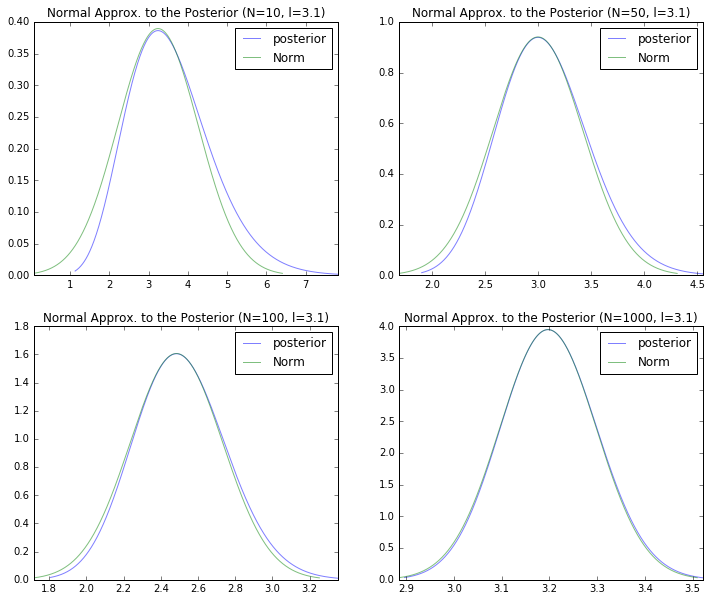

In [82]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats

def simulate(lamb, fignum=1):
    plt.figure(fignum, figsize=(12, 10))
    for n, pltnum in [(10, 221), (50, 222), (100, 223), (1000, 224)]:
        # Generate some samples from our "true distribution"
        y = stats.expon.rvs(scale=1/lamb, size=n)
        
        # Generate our posterior density
        # (Of course for a more complex model we would probably 
        #  draw samples instead of using the analytical form)
        alpha = n + 1
        beta = n * y.mean() + 1.
        post = stats.gamma(alpha, scale = 1. / beta)
        
        # Plot the posterior and normal approximation
        plt.subplot(pltnum)
        x = np.linspace(post.ppf(0.001), post.ppf(0.999), 1000)
        pd.Series(post.pdf(x), index=x).plot(alpha=0.5, label='posterior')
        
        # Generate our normal approximation
        mu = (alpha - 1.) / beta
        sigma2 = n / beta ** 2
        norm = stats.norm(loc=mu, scale=np.sqrt(sigma2))
        
        # Plot
        x = np.linspace(norm.ppf(0.001), norm.ppf(0.999), 1000)
        pd.Series(norm.pdf(x), index=x).plot(alpha=0.5, label='Norm')
        plt.title('Normal Approx. to the Posterior (N=%d, l=%.1f)' % (n, lamb))
        plt.legend(loc='best')
    
simulate(lamb=3.14, fignum=1)

The normal distribution is a pretty good approximation to the posterior as \\(n\\) grows larger.  Also notice that the posterior distribution gets closer and closer to the "true" value of the parameter \\(3.14\\) as the prior has less and less of an effect compared to the likelihood.  The posterior's variance around the mode is also much tighter as our estimate of \\(\lambda\\) gets better with more data.

# Conclusion

The normal distribution keeps popping up time and time again.  From the central limit theorem, one would expect that it occurs in many different large sample problems.  This post shows that there is another instance where it provides a good approximation of a distribution using a different mechanic of a second order Talyor approximation of the log posterior distribution.  It's a very interesting application that surprised me.  Hopefully it is a bit less surprising to you too!

## References and Further Reading

* Wikipedia: [Bayesian Inference](https://en.wikipedia.org/wiki/Bayesian_inference), [Maximum Likelihood Estimate](https://en.wikipedia.org/wiki/Maximum_likelihood), [exponential distribution](https://en.wikipedia.org/wiki/Exponential_distribution), [gamma distribution](https://en.wikipedia.org/wiki/Gamma_distribution), [Fisher Information](https://en.wikipedia.org/wiki/Fisher_information)
* *Bayesian Data Analysis*, Gelman, Carlin, Stern.


## Notes

List of Notes: [^1]

[^1]: This section was based on the proof in Appendix "Outline of proofs of limit theorems" in *Bayesian Data Analysis*.  I recommend taking a look at it for the full details.

